## COMM 414 Assignment 4

Section 102 Team 17

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, LogisticRegressionCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree


### Data Preprocessing

In [ ]:
teams = pd.read_csv('game_teams_stats.csv')
goalies = pd.read_csv('game_goalie_stats.csv')

In [ ]:
teams

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52605,2018030416,19,home,False,REG,Craig Berube,1.0,29.0,29.0,20.0,4.0,0.0,58.7,12.0,11.0,9.0,right
52606,2018030417,19,away,True,REG,Craig Berube,4.0,20.0,36.0,2.0,0.0,0.0,49.0,7.0,8.0,21.0,right
52607,2018030417,6,home,False,REG,Bruce Cassidy,1.0,33.0,28.0,0.0,1.0,0.0,51.0,13.0,6.0,7.0,right
52608,2018030417,19,away,True,REG,Craig Berube,4.0,20.0,36.0,2.0,0.0,0.0,49.0,7.0,8.0,21.0,right


In [ ]:
# Convert binary columns into dummies for data: teams

teams['HoA'] = teams['HoA'].map({'home': 1., 'away': 0.}) # Home = 1, Away = 0
teams['won'] = teams['won'].map({True: 1., False: 0.}) # Won = 1, Lost = 0
teams['settled_in'] = teams['settled_in'].map({'REG': 1., 'OT': 0.}) # REG(Regular) = 1, OT(Overtime) = 0
teams['startRinkSide'] = teams['startRinkSide'].map({'left': 1., 'right': 0.}) # Left = 1, Right = 0
teams


,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,0.0,0.0,1.0,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,1.0
1,2016020045,16,1.0,1.0,1.0,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,1.0
2,2017020812,24,0.0,1.0,0.0,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,0.0
3,2017020812,7,1.0,0.0,0.0,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,0.0
4,2015020314,21,0.0,1.0,1.0,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52605,2018030416,19,1.0,0.0,1.0,Craig Berube,1.0,29.0,29.0,20.0,4.0,0.0,58.7,12.0,11.0,9.0,0.0
52606,2018030417,19,0.0,1.0,1.0,Craig Berube,4.0,20.0,36.0,2.0,0.0,0.0,49.0,7.0,8.0,21.0,0.0
52607,2018030417,6,1.0,0.0,1.0,Bruce Cassidy,1.0,33.0,28.0,0.0,1.0,0.0,51.0,13.0,6.0,7.0,0.0
52608,2018030417,19,0.0,1.0,1.0,Craig Berube,4.0,20.0,36.0,2.0,0.0,0.0,49.0,7.0,8.0,21.0,0.0


In [ ]:
teams.isna().sum()

game_id                       0
team_id                       0
HoA                           0
won                           0
settled_in                   48
head_coach                   28
goals                         8
shots                         8
hits                       4928
pim                           8
powerPlayOpportunities        8
powerPlayGoals                8
faceOffWinPercentage      22148
giveaways                  4928
takeaways                  4928
blocked                    4928
startRinkSide              2392
dtype: int64

In [ ]:
teams.dropna(inplace = True)

In [ ]:
teams.shape

(29554, 17)

In [ ]:
teams['game_team'] = teams['game_id'].astype(str) + '_' + teams['team_id'].astype(str)

teams.set_index('game_team', inplace=True)

teams

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
game_team,,,,,,,,,,,,,,,,,
2016020045_4,2016020045,4,0.0,0.0,1.0,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,1.0
2016020045_16,2016020045,16,1.0,1.0,1.0,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,1.0
2017020812_24,2017020812,24,0.0,1.0,0.0,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,0.0
2017020812_7,2017020812,7,1.0,0.0,0.0,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,0.0
2015020314_21,2015020314,21,0.0,1.0,1.0,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018030416_19,2018030416,19,1.0,0.0,1.0,Craig Berube,1.0,29.0,29.0,20.0,4.0,0.0,58.7,12.0,11.0,9.0,0.0
2018030417_19,2018030417,19,0.0,1.0,1.0,Craig Berube,4.0,20.0,36.0,2.0,0.0,0.0,49.0,7.0,8.0,21.0,0.0
2018030417_6,2018030417,6,1.0,0.0,1.0,Bruce Cassidy,1.0,33.0,28.0,0.0,1.0,0.0,51.0,13.0,6.0,7.0,0.0


In [ ]:
# Drop duplicates indecies
teams.reset_index(inplace=True)

teams.drop_duplicates(subset='game_team', inplace=True)

teams.set_index('game_team', inplace=True)

teams

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
game_team,,,,,,,,,,,,,,,,,
2016020045_4,2016020045,4,0.0,0.0,1.0,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,1.0
2016020045_16,2016020045,16,1.0,1.0,1.0,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,1.0
2017020812_24,2017020812,24,0.0,1.0,0.0,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,0.0
2017020812_7,2017020812,7,1.0,0.0,0.0,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,0.0
2015020314_21,2015020314,21,0.0,1.0,1.0,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018030415_6,2018030415,6,1.0,0.0,1.0,Bruce Cassidy,1.0,39.0,43.0,2.0,3.0,0.0,40.6,4.0,11.0,15.0,0.0
2018030416_6,2018030416,6,0.0,1.0,1.0,Bruce Cassidy,5.0,32.0,27.0,10.0,4.0,1.0,41.3,4.0,10.0,16.0,0.0
2018030416_19,2018030416,19,1.0,0.0,1.0,Craig Berube,1.0,29.0,29.0,20.0,4.0,0.0,58.7,12.0,11.0,9.0,0.0


### The Goalie Data

In [ ]:
goalies

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2016020045,8473607,4,1504,0,0,0,16,12,1,0,11,0,13,3,NaN,75.000000,33.333333,84.615385
1,2016020045,8473461,4,2011,0,0,0,11,9,1,0,8,0,10,1,L,81.818182,100.000000,80.000000
2,2016020045,8470645,16,3598,0,0,0,27,23,2,0,21,0,23,4,W,85.185185,50.000000,91.304348
3,2017020812,8468011,24,3696,0,0,0,33,30,1,2,27,3,28,2,W,90.909091,50.000000,96.428571
4,2017020812,8475215,7,3539,0,0,0,33,29,4,1,24,1,27,5,L,87.878788,80.000000,88.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56651,2018030416,8476412,19,3487,0,0,0,31,27,3,1,23,1,26,4,L,87.096774,75.000000,88.461538
56652,2018030417,8476412,19,3600,0,0,0,33,32,3,0,29,0,30,3,W,96.969697,100.000000,96.666667
56653,2018030417,8471695,6,3394,0,0,0,20,16,0,0,16,0,20,0,L,80.000000,NaN,80.000000
56654,2018030417,8476412,19,3600,0,0,0,33,32,3,0,29,0,30,3,W,96.969697,100.000000,96.666667


In [ ]:
goalies.isna().sum()

game_id                          0
player_id                        0
team_id                          0
timeOnIce                        0
assists                          0
goals                            0
pim                              0
shots                            0
saves                            0
powerPlaySaves                   0
shortHandedSaves                 0
evenSaves                        0
shortHandedShotsAgainst          0
evenShotsAgainst                 0
powerPlayShotsAgainst            0
decision                      4102
savePercentage                 139
powerPlaySavePercentage       4743
evenStrengthSavePercentage     197
dtype: int64

In [ ]:
goalies.dropna(inplace = True)

In [ ]:
goalies.shape

(49284, 19)

In [ ]:
goalies['game_team'] = goalies['game_id'].astype(str) + '_' + goalies['team_id'].astype(str)
goalies

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage,game_team
1,2016020045,8473461,4,2011,0,0,0,11,9,1,0,8,0,10,1,L,81.818182,100.0,80.000000,2016020045_4
2,2016020045,8470645,16,3598,0,0,0,27,23,2,0,21,0,23,4,W,85.185185,50.0,91.304348,2016020045_16
3,2017020812,8468011,24,3696,0,0,0,33,30,1,2,27,3,28,2,W,90.909091,50.0,96.428571,2017020812_24
4,2017020812,8475215,7,3539,0,0,0,33,29,4,1,24,1,27,5,L,87.878788,80.0,88.888889,2017020812_7
5,2015020314,8473575,21,3600,0,0,0,21,20,3,1,16,1,17,3,W,95.238095,100.0,94.117647,2015020314_21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56649,2018030416,8476412,19,3487,0,0,0,31,27,3,1,23,1,26,4,L,87.096774,75.0,88.461538,2018030416_19
56650,2018030416,8471695,6,3600,0,0,0,29,28,12,1,15,1,16,12,W,96.551724,100.0,93.750000,2018030416_6
56651,2018030416,8476412,19,3487,0,0,0,31,27,3,1,23,1,26,4,L,87.096774,75.0,88.461538,2018030416_19
56652,2018030417,8476412,19,3600,0,0,0,33,32,3,0,29,0,30,3,W,96.969697,100.0,96.666667,2018030417_19


In [ ]:
goalies = goalies.groupby('game_team').mean()
goalies

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
game_team,,,,,,,,,,,,,,,,,,
2000020001_21,2000020001,8451033,21,3880,0,0,0,21,19,9,0,10,0,11,10,90.476190,90.000000,90.909091
2000020001_25,2000020001,8445386,25,3900,0,0,0,28,26,9,0,17,0,18,10,92.857143,90.000000,94.444444
2000020002_6,2000020002,8455994,6,3900,0,0,0,33,29,3,3,23,3,25,5,87.878788,60.000000,92.000000
2000020002_9,2000020002,8459579,9,3900,0,0,0,38,34,13,2,19,2,21,15,89.473684,86.666667,90.476190
2000020003_16,2000020003,8459432,16,3600,0,0,0,30,26,8,1,17,1,21,8,86.666667,100.000000,80.952381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019030414_25,2019030414,8471418,25,3972,0,0,0,35,30,7,0,23,0,25,10,85.714286,70.000000,92.000000
2019030415_14,2019030415,8476883,14,5363,0,0,0,33,30,3,0,27,0,30,3,90.909091,100.000000,90.000000
2019030415_25,2019030415,8471418,25,5350,0,0,0,41,39,3,0,36,0,38,3,95.121951,100.000000,94.736842


In [ ]:
unique_index_count = goalies.index.nunique()
unique_index_count

44559

In [ ]:
goalies = goalies.iloc[:, -3:]
goalies

,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
game_team,,,
2000020001_21,90.476190,90.000000,90.909091
2000020001_25,92.857143,90.000000,94.444444
2000020002_6,87.878788,60.000000,92.000000
2000020002_9,89.473684,86.666667,90.476190
2000020003_16,86.666667,100.000000,80.952381
...,...,...,...
2019030414_25,85.714286,70.000000,92.000000
2019030415_14,90.909091,100.000000,90.000000
2019030415_25,95.121951,100.000000,94.736842


In [ ]:
df = pd.merge(teams, goalies, on='game_team', how='left')
df

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
game_team,,,,,,,,,,,,,,,,,,,,
2016020045_4,2016020045,4,0.0,0.0,1.0,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,1.0,81.818182,100.0,80.000000
2016020045_16,2016020045,16,1.0,1.0,1.0,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,1.0,85.185185,50.0,91.304348
2017020812_24,2017020812,24,0.0,1.0,0.0,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,0.0,90.909091,50.0,96.428571
2017020812_7,2017020812,7,1.0,0.0,0.0,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,0.0,87.878788,80.0,88.888889
2015020314_21,2015020314,21,0.0,1.0,1.0,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,1.0,95.238095,100.0,94.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018030415_6,2018030415,6,1.0,0.0,1.0,Bruce Cassidy,1.0,39.0,43.0,2.0,3.0,0.0,40.6,4.0,11.0,15.0,0.0,90.476190,100.0,89.473684
2018030416_6,2018030416,6,0.0,1.0,1.0,Bruce Cassidy,5.0,32.0,27.0,10.0,4.0,1.0,41.3,4.0,10.0,16.0,0.0,96.551724,100.0,93.750000
2018030416_19,2018030416,19,1.0,0.0,1.0,Craig Berube,1.0,29.0,29.0,20.0,4.0,0.0,58.7,12.0,11.0,9.0,0.0,87.096774,75.0,88.461538


In [ ]:
df.isna().sum()

game_id                          0
team_id                          0
HoA                              0
won                              0
settled_in                       0
head_coach                       0
goals                            0
shots                            0
hits                             0
pim                              0
powerPlayOpportunities           0
powerPlayGoals                   0
faceOffWinPercentage             0
giveaways                        0
takeaways                        0
blocked                          0
startRinkSide                    0
savePercentage                1897
powerPlaySavePercentage       1897
evenStrengthSavePercentage    1897
dtype: int64

In [ ]:
df.dropna(inplace = True)
df.isna().sum()

game_id                       0
team_id                       0
HoA                           0
won                           0
settled_in                    0
head_coach                    0
goals                         0
shots                         0
hits                          0
pim                           0
powerPlayOpportunities        0
powerPlayGoals                0
faceOffWinPercentage          0
giveaways                     0
takeaways                     0
blocked                       0
startRinkSide                 0
savePercentage                0
powerPlaySavePercentage       0
evenStrengthSavePercentage    0
dtype: int64

In [ ]:
df = df.drop('head_coach', axis=1)
df

,game_id,team_id,HoA,won,settled_in,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
game_team,,,,,,,,,,,,,,,,,,,
2016020045_4,2016020045,4,0.0,0.0,1.0,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,1.0,81.818182,100.0,80.000000
2016020045_16,2016020045,16,1.0,1.0,1.0,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,1.0,85.185185,50.0,91.304348
2017020812_24,2017020812,24,0.0,1.0,0.0,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,0.0,90.909091,50.0,96.428571
2017020812_7,2017020812,7,1.0,0.0,0.0,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,0.0,87.878788,80.0,88.888889
2015020314_21,2015020314,21,0.0,1.0,1.0,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,1.0,95.238095,100.0,94.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018030415_19,2018030415,19,0.0,1.0,1.0,2.0,21.0,34.0,6.0,1.0,0.0,59.4,7.0,8.0,15.0,0.0,97.435897,100.0,96.969697
2018030415_6,2018030415,6,1.0,0.0,1.0,1.0,39.0,43.0,2.0,3.0,0.0,40.6,4.0,11.0,15.0,0.0,90.476190,100.0,89.473684
2018030416_6,2018030416,6,0.0,1.0,1.0,5.0,32.0,27.0,10.0,4.0,1.0,41.3,4.0,10.0,16.0,0.0,96.551724,100.0,93.750000


In [ ]:
df.describe()

,game_id,team_id,HoA,won,settled_in,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
count,2.271100e+04,22711.000000,22711.000000,22711.000000,22711.000000,22711.000000,22711.000000,22711.000000,22711.000000,22711.000000,22711.000000,22711.000000,22711.000000,22711.00000,22711.000000,22711.000000,22711.000000,22711.000000,22711.000000
mean,2.014610e+09,17.351063,0.495090,0.503721,0.763419,2.780195,30.361543,23.462287,10.424552,3.200872,0.605301,49.937370,8.841795,6.87473,14.440095,0.535732,90.937866,84.768146,91.773600
std,2.849506e+06,11.970943,0.499987,0.499997,0.424992,1.644905,6.802544,8.633512,7.979312,1.553786,0.766192,7.191337,4.886139,3.73893,5.102094,0.498733,6.112329,22.842845,6.531533
min,2.010020e+09,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2.000000,2.000000,0.000000,0.000000,20.800000,0.000000,0.00000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,2.012021e+09,8.000000,0.000000,0.000000,1.000000,2.000000,26.000000,17.000000,6.000000,2.000000,0.000000,45.100000,5.000000,4.00000,11.000000,0.000000,87.878788,75.000000,88.461538
50%,2.015020e+09,16.000000,0.000000,1.000000,1.000000,3.000000,30.000000,23.000000,8.000000,3.000000,0.000000,50.000000,8.000000,6.00000,14.000000,1.000000,91.891892,100.000000,92.857143
75%,2.017021e+09,24.000000,1.000000,1.000000,1.000000,4.000000,35.000000,29.000000,13.000000,4.000000,1.000000,54.700000,12.000000,9.00000,18.000000,1.000000,95.121951,100.000000,96.153846
max,2.019030e+09,54.000000,1.000000,1.000000,1.000000,10.000000,88.000000,75.000000,183.000000,12.000000,6.000000,79.200000,33.000000,31.00000,62.000000,1.000000,100.000000,100.000000,100.000000


### Question 1: Predicting Goals

### 1.1 Linear Regression (All relevent x variables)

In [ ]:
y = df['goals']
x = df.drop(['goals','game_id', 'team_id', 'won'] , axis=1)

In [ ]:
x1 = sm.add_constant(x)
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2, random_state = 42)

linear_reg1 = sm.OLS(y_train, x_train).fit()
print(linear_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  goals   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     397.0
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:20:34   Log-Likelihood:                -32297.
No. Observations:               18168   AIC:                         6.463e+04
Df Residuals:                   18152   BIC:                         6.475e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
y1_pred = linear_reg1.predict(x_test)

mse1 = mean_squared_error(y_test, y1_pred)
rmse1 = np.sqrt(mse1)
rsqrt1 = r2_score(y_test, y1_pred)

print(f'MSE: {mse1}, RMSE: {rmse1}, R squared: {rsqrt1}')


MSE: 1.9977693927569558, RMSE: 1.413424703603611, R squared: 0.24329456543068162


### 1.2 Linear Regression (Selected x variables)

In [ ]:
pvalues = linear_reg1.pvalues
x2_columns = pvalues[pvalues < 0.05].index
x2_columns

Index(['HoA', 'settled_in', 'shots', 'hits', 'pim', 'powerPlayOpportunities',
       'powerPlayGoals', 'giveaways', 'takeaways', 'blocked'],
      dtype='object')

In [ ]:
x2 = x[x2_columns]
x2 = sm.add_constant(x2)
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size = 0.2, random_state = 42)
linear_reg2 = sm.OLS(y_train, x_train).fit()
print(linear_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  goals   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     588.8
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:20:34   Log-Likelihood:                -32323.
No. Observations:               18168   AIC:                         6.467e+04
Df Residuals:                   18157   BIC:                         6.475e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [ ]:
y2_pred = linear_reg2.predict(x_test)

mse2 = mean_squared_error(y_test, y2_pred)
rmse2 = np.sqrt(mse2)
rsqrt2 = r2_score(y_test, y2_pred)

print(f'MSE: {mse2}, RMSE: {rmse2}, R squared: {rsqrt2}')

MSE: 2.0044241316625238, RMSE: 1.4157768650682647, R squared: 0.2407739155930475


### 1.3 Lasso Regression

In [ ]:
scaler = StandardScaler()
x_lasso = scaler.fit_transform(x) # Standardize features
x_train, x_test, y_train, y_test = train_test_split(x_lasso, y, test_size = 0.2, random_state = 42)

In [ ]:
lasso_cv = LassoCV(cv=5, random_state=0)  # 5 cross-validation folds

lasso_cv.fit(x_train, y_train)

best_lambda = lasso_cv.alpha_
print("Best lambda:", best_lambda)


Best lambda: 0.004206051483275956


In [ ]:
coefficients = lasso_cv.coef_
intercept = lasso_cv.intercept_

lasso_coefs = pd.Series(dict(zip(list(x), coefficients)))
lasso_coefs, intercept

(HoA                           0.075405
 settled_in                    0.093761
 shots                         0.203592
 hits                         -0.144690
 pim                           0.043205
 powerPlayOpportunities       -0.160415
 powerPlayGoals                0.739405
 faceOffWinPercentage          0.000764
 giveaways                    -0.023896
 takeaways                     0.124233
 blocked                       0.158479
 startRinkSide                -0.002156
 savePercentage                0.061647
 powerPlaySavePercentage       0.000000
 evenStrengthSavePercentage    0.016292
 dtype: float64,
 2.7798903963880575)

In [ ]:
y3_pred = lasso_cv.predict(x_test)

mse3 = mean_squared_error(y_test, y3_pred)
rmse3 = np.sqrt(mse3)
rsqrt3 = r2_score(y_test, y3_pred)

print(f'MSE: {mse3}, RMSE: {rmse3}, R squared: {rsqrt3}')

MSE: 1.9987762919669338, RMSE: 1.4137808500495874, R squared: 0.24291317701467297


### 1.4 Principle Component Analysis (PCA)

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.99022871,  0.55668423, -0.49417052, ..., -1.4920475 ,
         0.6668254 , -1.80261801],
       [ 1.00986771,  0.55668423, -0.34716347, ..., -0.94118094,
        -1.52209199, -0.07184565],
       [-0.99022871, -1.7963505 ,  0.53487887, ..., -0.00470778,
        -1.52209199,  0.71270776],
       ...,
       [-0.99022871,  0.55668423,  0.24086476, ...,  0.9184686 ,
         0.6668254 ,  0.3026003 ],
       [ 1.00986771,  0.55668423, -0.20015641, ..., -0.62843089,
        -0.42763329, -0.50709905],
       [-0.99022871,  0.55668423, -1.52321992, ...,  0.98685204,
         0.6668254 ,  0.74916176]])

In [ ]:
pca = PCA(0.95)
x_pca = pca.fit_transform(x_scaled)
x_pca.shape

(22711, 13)

In [ ]:
x.shape

(22711, 15)

In [ ]:
pca.explained_variance_ratio_

array([0.14435658, 0.11483739, 0.1000565 , 0.08078631, 0.07350189,
       0.06857993, 0.06433649, 0.06375386, 0.05570854, 0.05449899,
       0.05037666, 0.04815615, 0.04129786])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state = 42)
x_train = sm.add_constant(x_train)
pca_reg = sm.OLS(y_train, x_train).fit()
print(pca_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  goals   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     334.6
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:20:34   Log-Likelihood:                -32923.
No. Observations:               18168   AIC:                         6.587e+04
Df Residuals:                   18154   BIC:                         6.598e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7818      0.011    252.928      0.0

In [ ]:
x_test = sm.add_constant(x_test)
y4_pred = pca_reg.predict(x_test)

mse4 = mean_squared_error(y_test, y4_pred)
rmse4 = np.sqrt(mse4)
rsqrt4 = r2_score(y_test, y4_pred)

print(f'MSE: {mse4}, RMSE: {rmse4}, R squared: {rsqrt4}')

MSE: 2.1549887889478248, RMSE: 1.4679880070858293, R squared: 0.1837437624457794


## Question 2: Predicting Win/Loss

### 2.1 Logistic Regression (All relevant x vairables)

> Indented block

> Indented block





In [ ]:
y = df['won']
x = df.drop(['game_id', 'team_id', 'won'] , axis=1)

In [ ]:
x1 = sm.add_constant(x)
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2, random_state = 42)
logit_reg1 = sm.Logit(y_train, x_train).fit()
print(logit_reg1.summary())

Optimization terminated successfully.
         Current function value: 0.176932
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    won   No. Observations:                18168
Model:                          Logit   Df Residuals:                    18151
Method:                           MLE   Df Model:                           16
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.7447
Time:                        09:20:34   Log-Likelihood:                -3214.5
converged:                       True   LL-Null:                       -12592.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -80.9400      1.522    -53.186      0.000     -

In [ ]:
predictions = logit_reg1.predict(x_test)
predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9306625577812019


In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[2136  153]
 [ 162 2092]]


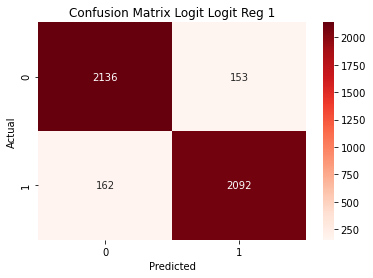

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logit Logit Reg 1')
plt.show()

In [ ]:
evaluation_report = classification_report(y_test, predictions)
print(evaluation_report)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2289
         1.0       0.93      0.93      0.93      2254

    accuracy                           0.93      4543
   macro avg       0.93      0.93      0.93      4543
weighted avg       0.93      0.93      0.93      4543



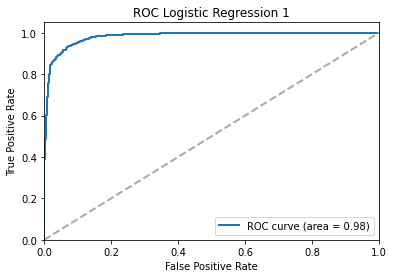

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, logit_reg1.predict(x_test))
auc = roc_auc_score(y_test, logit_reg1.predict(x_test))
plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Logistic Regression 1')
plt.legend(loc="lower right")
plt.show()


### 2.2 Logistic Regression (Selected x vairables)

In [ ]:
pvalues = logit_reg1.pvalues
x2_columns = pvalues[pvalues < 0.05].index
x2_columns

Index(['const', 'HoA', 'goals', 'hits', 'pim', 'powerPlayOpportunities',
       'faceOffWinPercentage', 'giveaways', 'savePercentage',
       'evenStrengthSavePercentage'],
      dtype='object')

In [ ]:
x2 = x1[x2_columns]
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size = 0.2, random_state = 42)
logit_reg2 = sm.Logit(y_train, x_train).fit()
print(logit_reg2.summary())

Optimization terminated successfully.
         Current function value: 0.177089
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    won   No. Observations:                18168
Model:                          Logit   Df Residuals:                    18158
Method:                           MLE   Df Model:                            9
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.7445
Time:                        09:20:34   Log-Likelihood:                -3217.4
converged:                       True   LL-Null:                       -12592.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -80.8035      1.502    -53.805      0.000     -

In [ ]:
predictions = logit_reg2.predict(x_test)
predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9286814880035219


In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[2133  156]
 [ 168 2086]]


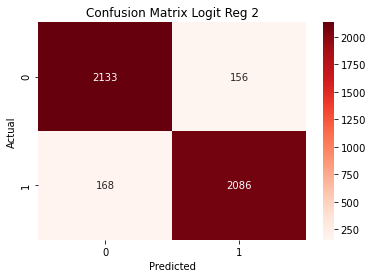

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logit Reg 2')
plt.show()

In [ ]:
evaluation_report = classification_report(y_test, predictions)
print(evaluation_report)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2289
         1.0       0.93      0.93      0.93      2254

    accuracy                           0.93      4543
   macro avg       0.93      0.93      0.93      4543
weighted avg       0.93      0.93      0.93      4543



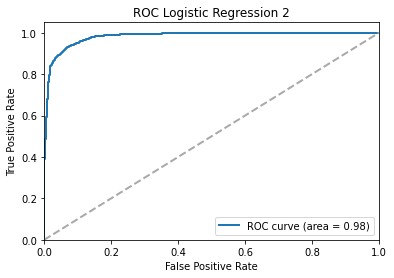

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, logit_reg2.predict(x_test))
auc = roc_auc_score(y_test, logit_reg2.predict(x_test))
plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Logistic Regression 2')
plt.legend(loc="lower right")
plt.show()

### 2.3 Lasso Logistic Regression

In [ ]:
scaler = StandardScaler()
x_lasso = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_lasso, y, test_size = 0.2, random_state = 42)

lasso_logit = LogisticRegressionCV(penalty = 'l1', solver = 'liblinear', cv = 5, max_iter = 1000, random_state = 42)
lasso_logit.fit(x_train, y_train)

y_pred = lasso_logit.predict(x_test)
evaluation_report = classification_report(y_test, y_pred)

print(evaluation_report)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2289
         1.0       0.93      0.93      0.93      2254

    accuracy                           0.93      4543
   macro avg       0.93      0.93      0.93      4543
weighted avg       0.93      0.93      0.93      4543



In [ ]:
lasso_logit.fit(x_train, y_train)

# To find the optimized lambda (C value)
optimized_lambda = np.mean(lasso_logit.C_)
print(f"Optimized Lambda (C value): {optimized_lambda}")

Optimized Lambda (C value): 166.81005372000558


In [ ]:
#optimal_lambda = lasso_logit.alpha[0]  # The best lambda for each class
#optimal_lambda

In [ ]:
coefficients = lasso_logit.coef_[0]
intercept = lasso_logit.intercept_

lasso_coefs = pd.Series(dict(zip(x, coefficients)))
lasso_coefs, intercept

(HoA                           0.208794
 settled_in                    0.027677
 goals                         4.550758
 shots                        -0.009969
 hits                         -0.097508
 pim                          -0.233359
 powerPlayOpportunities        0.141408
 powerPlayGoals               -0.064544
 faceOffWinPercentage          0.145862
 giveaways                    -0.191372
 takeaways                     0.019372
 blocked                      -0.037296
 startRinkSide                -0.010802
 savePercentage                4.578349
 powerPlaySavePercentage       0.022865
 evenStrengthSavePercentage    0.312410
 dtype: float64,
 array([-0.16180307]))

In [ ]:
predictions = lasso_logit.predict(x_test)
predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9306625577812019


In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[2136  153]
 [ 162 2092]]


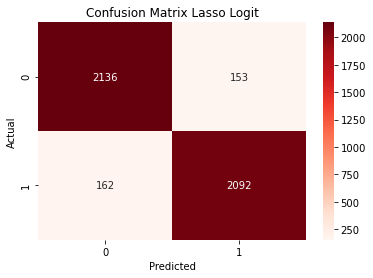

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Lasso Logit')
plt.show()

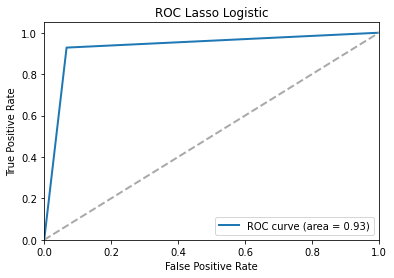

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, lasso_logit.predict(x_test))
auc = roc_auc_score(y_test, lasso_logit.predict(x_test))
plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Lasso Logistic')
plt.legend(loc="lower right")
plt.show()

## Question 3: Decision Trees

### 3.1 Decision Tree (All relevant x variables)

In [ ]:
y = df['won']
x = df.drop(['game_id', 'team_id', 'won'] , axis=1)

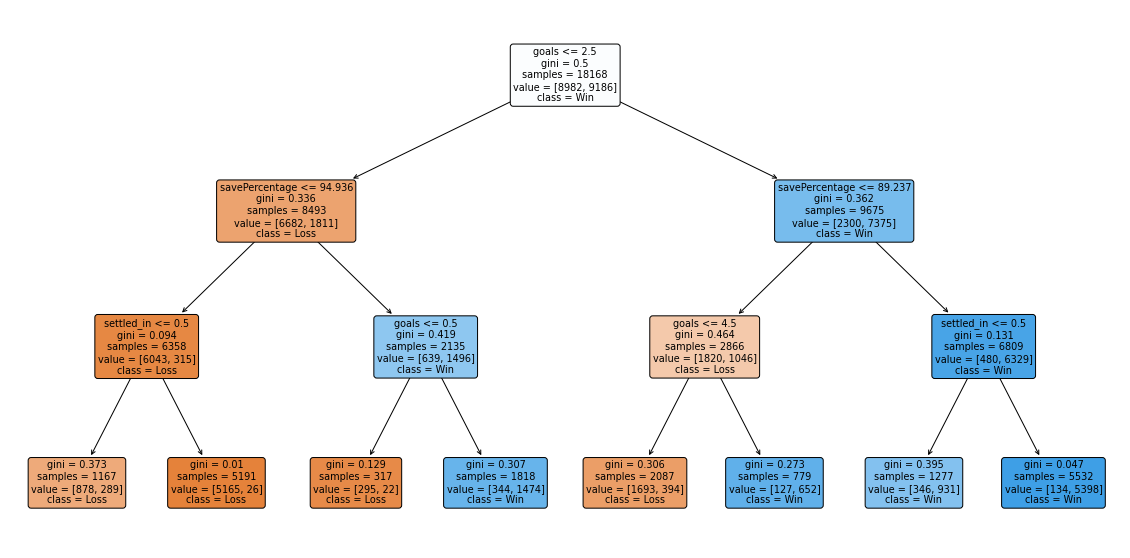

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

tree1 = DecisionTreeClassifier(max_depth = 3)  # Set max_depth = 3
tree1.fit(x_train, y_train)

plt.figure(figsize = (20,10))
plot_tree(tree1, filled = True, feature_names = x.columns, class_names = ['Loss', 'Win'], rounded = True)
plt.show()

In [ ]:
fi1 = pd.Series(tree1.feature_importances_, index = x_train.columns)
print("Feature Importances:\n", fi1.sort_values(ascending = False))

Feature Importances:
 goals                         0.548639
savePercentage                0.413977
settled_in                    0.037384
HoA                           0.000000
shots                         0.000000
hits                          0.000000
pim                           0.000000
powerPlayOpportunities        0.000000
powerPlayGoals                0.000000
faceOffWinPercentage          0.000000
giveaways                     0.000000
takeaways                     0.000000
blocked                       0.000000
startRinkSide                 0.000000
powerPlaySavePercentage       0.000000
evenStrengthSavePercentage    0.000000
dtype: float64


In [ ]:
y_pred = tree1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9152542372881356


### 3.2 Decision Tree (Selected x variables)

In [ ]:
predictors = ['goals', 'savePercentage', 'settled_in']

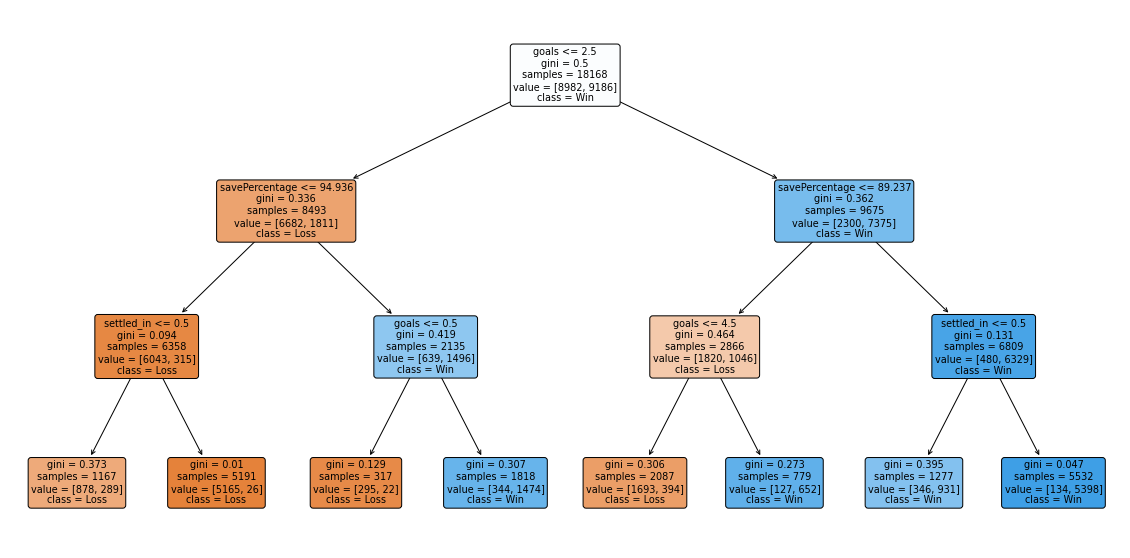

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x[predictors], y, test_size = 0.2, random_state = 42)

tree2 = DecisionTreeClassifier(max_depth = 3)  # Set max_depth = 3
tree2.fit(x_train, y_train)

plt.figure(figsize = (20,10))
plot_tree(tree2, filled = True, feature_names = predictors, class_names = ['Loss', 'Win'], rounded = True)
plt.show()

In [ ]:
fi1 = pd.Series(tree2.feature_importances_, index = x_train.columns)
print("Feature Importances:\n", fi1.sort_values(ascending = False))

Feature Importances:
 goals             0.548639
savePercentage    0.413977
settled_in        0.037384
dtype: float64


In [ ]:
y_pred = tree2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9152542372881356
